In [1]:
# Realization of a three inputs bipolar NOR gate using perceptron

"""Importing python library."""
from sklearn.linear_model import Perceptron
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""Create a variable named data that is a list that contains the eight possible inputs to an NOR gate."""

data = [[-1, -1, -1], [-1, -1, 1], [-1, 1, -1], [-1, 1, 1], [1, -1, -1], [1, -1, 1], [1, 1, -1], [1, 1, 1]]
labels = [1, -1, -1, -1, -1, -1, -1, -1]

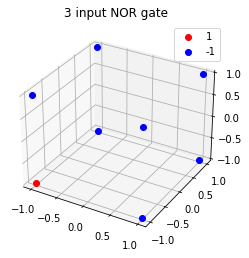

In [3]:
# Syntax for 3-D projection
fig = plt.figure()
ax = plt.axes(projection="3d")
for inp,target in zip(data,labels):
        plt.plot(inp[0],inp[1],inp[2],'ro' if (target == 1.0) else 'bo')
plt.legend(['1','-1'])
plt.title("3 input NOR gate")  
plt.show()

In [4]:
# Perceptron to learn NOR.
classifier = Perceptron(max_iter = 40)
classifier.fit(data, labels)
#Training Complete
print("Training complete - ",str(classifier.score(data,labels)*100),"%")

100.0 %


In [39]:
# Function to calculate the accuracy of the model
def get_accuracy(test_inp, test_out, true_inp, true_out):
    index = -1
    for i in range(8):
        if((true_inp[i] == test_inp).all()):
            index = i
            break
        #index = np.where((true_inp[i] == test_inp).all())
    if test_out == true_out[index]:
        return 1
    else:
        return 0

In [56]:
test_n = int(input("Enter the number of test samples : "))
test = np.random.randint(2, size=(test_n, 3))
for i in range(test_n):
    test[i] = [-1 if i==0 else i for i in test[i]]
test

Enter the number of test samples : 3


array([[-1, -1, -1],
       [-1, -1,  1],
       [ 1,  1,  1]])

In [57]:
# Testing
#test = np.array([[1, -1, 1], ], np.int32)
prediction = classifier.predict(test)
accuracy = 0
print("Test Input\tPrediction")
print("--------------------------------------")
for i in range(test_n):
    print(str(test[i]),"\t",prediction[i])
for i in range(test_n):
    accuracy += get_accuracy(test[i],prediction[i], data, labels)
    
accuracy = (accuracy/test_n) * 100
print("Accuracy of model : %3.2f"%accuracy+"%")

Test Input	Prediction
--------------------------------------
[-1 -1 -1] 	 1
[-1 -1  1] 	 -1
[1 1 1] 	 -1
Accuracy of model : 100.00%


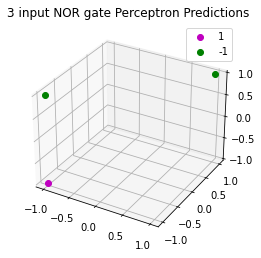

In [59]:
# Prediction plot
fig = plt.figure()
ax = plt.axes(projection="3d")
for inp,target in zip(test,prediction):
        plt.plot(inp[0],inp[1],inp[2],'mo' if (target == 1.0) else 'go')
plt.legend(['1','-1'])
plt.title("3 input NOR gate Perceptron Predictions")  
plt.show()